**Laboratorio de Métodos Cuantitativos Aplicados a la Gestión**

---

# **Primer Examen Parcial**

*30 de septiembre, 2025*




---


Nombre y Apellido: Alexander Ballera

---



Número de registro: 919064

---



**Abajo de esta línea, importá/instalá todas las *libraries* que consideres relevantes para la resolución de este examen.**

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pulp import LpProblem, LpVariable, LpMaximize, value
import pprint
import sympy as sp

## Unidad 1

### Ejercicio 1

Una empresa vende 6 productos ($A$, $B$, $C$, $D$, $E$, $F$) durante 18 semanas. Vas a simular los datos y trabajar con ellos.

**Simulación y armado de datos**

- Generar con NumPy:
  - Un `array` de cantidades de tamaño $18 \times 6$ (18 semanas y 6 productos) con enteros positivos razonables, cuyo nombre sea `q`.
  - Un `array` de precios unitarios (misma forma) con `float`s positivos, distribuidos uniformemente en un intervalo razonable, cuyo nombre sea `p`.
  - Un `array` con la enumeración de semanas a analizar, cuyo nombre sea `semanas`

In [205]:
# Voy a generar arrays con NumPy
# Cantidades vendidas: 18 semanas × 6 productos (A, B, C, D, E, F)
# Utilizo seed para que siempre se reproduzcan los mismos números aleatorios
# Genero una matriz de 18 x 6 con valoreas aleatorios enteros entre 50 y 199

np.random.seed(42)  # Para reproducibilidad
q = np.random.randint(50, 200, size=(18, 6))

print("Array de cantidades vendidas (q):")
print("Dimensiones:", q.shape, "- 18 semanas × 6 productos")
print("Primeras 5 semanas:")
print(q[:5])

# Array de precios unitarios: misma forma (18 × 6)
# Uso distribución uniforme con precios entre 10 y 50
p = np.random.uniform(10.0, 50.0, size=(18, 6))

print("\nArray de precios unitarios (p):")
print("Dimensiones:", p.shape, "- 18 semanas × 6 productos")
print("Primeras 5 semanas (redondeado a 2 decimales):")
print(np.round(p[:5], 2))

# Array de semanas a analizar del 1 al 18
semanas = np.arange(1, 19)

print("\nArray de semanas:")
print("Total semanas:", len(semanas))
print("Desde semana:", semanas[0], "hasta semana:", semanas[-1])

Array de cantidades vendidas (q):
Dimensiones: (18, 6) - 18 semanas × 6 productos
Primeras 5 semanas:
[[152 142  64 156 121  70]
 [152 171 124 137 166 149]
 [153 180 199 102  51 137]
 [ 87 179  70 107  71 138]
 [ 98 108  64 100 157 104]]

Array de precios unitarios (p):
Dimensiones: (18, 6) - 18 semanas × 6 productos
Primeras 5 semanas (redondeado a 2 decimales):
[[30.91 27.1  11.02 14.32 11.26 35.46]
 [22.57 30.34 46.3  19.97 26.42 40.22]
 [19.15 13.08 21.59 16.45 47.19 42.32]
 [35.34 44.86 42.15 17.46 45.7  31.57]
 [42.3  45.84 22.72 14.4  19.12 27.08]]

Array de semanas:
Total semanas: 18
Desde semana: 1 hasta semana: 18


- Nos interesará analizar el compotramiento de esta empresa en base a los primeros 3 productos ($A$, $B$, $C$). Armar un *DataFrame* semanal con columnas: `semana`, `producto_A`, `producto_B`, `producto_C`, `precio_A`, `precio_B`, `precio_C`.

  *Hint*: usar *slicing* puede ayudarte.

In [206]:
# Creo DF semanal de los 3 primeros productos (A, B, C)

cantidades_abc = q[:, :3]
precios_abc = p[:, :3]

df_empresa = pd.DataFrame({
    'semana': semanas,
    'producto_A': cantidades_abc[:, 0],
    'producto_B': cantidades_abc[:, 1], 
    'producto_C': cantidades_abc[:, 2],
    'precio_A': precios_abc[:, 0],
    'precio_B': precios_abc[:, 1],
    'precio_C': precios_abc[:, 2]
})

print("DF de la empresa (primeros 3 productos):")
print("Dimensiones del DF:", df_empresa.shape)
print("\nPrimeras 8 semanas:")
print(df_empresa.head(8))

DF de la empresa (primeros 3 productos):
Dimensiones del DF: (18, 7)

Primeras 8 semanas:
   semana  producto_A  producto_B  producto_C   precio_A   precio_B   precio_C
0       1         152         142          64  30.909313  27.101641  11.016765
1       2         152         171         124  22.574239  30.342828  46.302659
2       3         153         180         199  19.151927  13.079196  21.590058
3       4          87         179          70  35.336150  44.858424  42.146883
4       5          98         108          64  42.297606  45.843652  22.720139
5       6         113         180         100  42.720591  44.429223  10.278085
6       7          67         181         138  14.794615  23.504607  47.716388
7       8         139         102         179  24.545184  48.871283  48.497892


- Verificar que no haya valores nulos.

In [207]:
# Verifico no nulls
valores_nulos = df_empresa.isnull().sum()

print("Verificación de valores nulos por columna:")
print(valores_nulos)

print(f"\nTotal de valores nulos en el DF: {valores_nulos.sum()}")

if valores_nulos.sum() == 0:
    print("No hay valores nulos en el DF")
else:
    print("¡Se encontraron valores nulos!")

# Información adicional del DF
print("\nInformación del DF:")
print(f"- Filas: {len(df_empresa)}")
print(f"- Columnas: {len(df_empresa.columns)}")
print("- Tipos de datos:")
print(df_empresa.dtypes)

Verificación de valores nulos por columna:
semana        0
producto_A    0
producto_B    0
producto_C    0
precio_A      0
precio_B      0
precio_C      0
dtype: int64

Total de valores nulos en el DF: 0
No hay valores nulos en el DF

Información del DF:
- Filas: 18
- Columnas: 7
- Tipos de datos:
semana          int64
producto_A      int64
producto_B      int64
producto_C      int64
precio_A      float64
precio_B      float64
precio_C      float64
dtype: object


- Describir estadísticamente las columnas de cantidades, precios e ingresos.

In [208]:
# Calcular ingresos por producto (cantidad × precio)
df_empresa['ingreso_A'] = df_empresa['producto_A'] * df_empresa['precio_A']
df_empresa['ingreso_B'] = df_empresa['producto_B'] * df_empresa['precio_B']
df_empresa['ingreso_C'] = df_empresa['producto_C'] * df_empresa['precio_C']

# Describir estadísticamente las columnas de cantidades
print("ESTADÍSTICAS DESCRIPTIVAS")
print("="*50)

print("\n1. CANTIDADES (unidades vendidas):")
cantidades_cols = ['producto_A', 'producto_B', 'producto_C']
print(df_empresa[cantidades_cols].describe().round(2))

print("\n2. PRECIOS ($ por unidad):")
precios_cols = ['precio_A', 'precio_B', 'precio_C']
print(df_empresa[precios_cols].describe().round(2))

print("\n3. INGRESOS ($ total por producto):")
ingresos_cols = ['ingreso_A', 'ingreso_B', 'ingreso_C']
print(df_empresa[ingresos_cols].describe().round(2))

# Mostrar el DataFrame actualizado con ingresos
print("\n4. MUESTRA DEL DATAFRAME CON INGRESOS (primeras 5 semanas):")
print(df_empresa.head().round(2))

ESTADÍSTICAS DESCRIPTIVAS

1. CANTIDADES (unidades vendidas):
       producto_A  producto_B  producto_C
count       18.00       18.00       18.00
mean       111.06      135.56      115.06
std         43.51       46.98       45.15
min         51.00       50.00       54.00
25%         79.50       95.25       73.00
50%        104.50      139.50      112.00
75%        148.75      180.00      145.50
max        195.00      185.00      199.00

2. PRECIOS ($ por unidad):
       precio_A  precio_B  precio_C
count     18.00     18.00     18.00
mean      32.09     30.83     30.32
std       11.33     12.14     13.31
min       11.63     11.48     10.28
25%       22.84     20.56     20.03
50%       35.34     31.82     32.78
75%       42.59     41.01     41.02
max       46.33     48.87     48.50

3. INGRESOS ($ total por producto):
       ingreso_A  ingreso_B  ingreso_C
count      18.00      18.00      18.00
mean     3567.17    4012.70    3565.11
std      1931.55    1941.68    2231.07
min       991.2

**Totales y participaciones con operaciones vectorizadas**

- Agregar columnas al DataFrame:
  - Ingreso total por semana, denominada `ingreso_total`
  - Cantidad total por semana, denominada `cantidad_total`

In [209]:
# Agrego columnas de totales semanales usando operaciones vectorizadas

# Ingreso total por semana (suma de ingresos de A, B y C)
df_empresa['ingreso_total'] = (df_empresa['ingreso_A'] + 
                              df_empresa['ingreso_B'] + 
                              df_empresa['ingreso_C'])

# Cantidad total por semana (suma de cantidades de A, B y C)
df_empresa['cantidad_total'] = (df_empresa['producto_A'] + 
                               df_empresa['producto_B'] + 
                               df_empresa['producto_C'])

print("Columnas agregadas al DataFrame:")
print("Ingreso_total: Suma de ingresos de A, B y C por semana")
print("Cantidad_total: Suma de cantidades de A, B y C por semana")

print("\nPrimeras 8 semanas con totales:")
columnas_mostrar = ['semana', 'ingreso_A', 'ingreso_B', 'ingreso_C', 'ingreso_total', 'cantidad_total']
print(df_empresa[columnas_mostrar].head(8).round(2))

print("\nResumen de totales:")
print(f"- Rango ingreso total semanal: ${df_empresa['ingreso_total'].min():.2f} - ${df_empresa['ingreso_total'].max():.2f}")
print(f"- Rango cantidad total semanal: {df_empresa['cantidad_total'].min():.0f} - {df_empresa['cantidad_total'].max():.0f} unidades")

Columnas agregadas al DataFrame:
Ingreso_total: Suma de ingresos de A, B y C por semana
Cantidad_total: Suma de cantidades de A, B y C por semana

Primeras 8 semanas con totales:
   semana  ingreso_A  ingreso_B  ingreso_C  ingreso_total  cantidad_total
0       1    4698.22    3848.43     705.07        9251.72             358
1       2    3431.28    5188.62    5741.53       14361.44             447
2       3    2930.24    2354.26    4296.42        9580.92             532
3       4    3074.25    8029.66    2950.28       14054.18             336
4       5    4145.17    4951.11    1454.09       10550.37             270
5       6    4827.43    7997.26    1027.81       13852.50             393
6       7     991.24    4254.33    6584.86       11830.43             386
7       8    3411.78    4984.87    8681.12       17077.77             420

Resumen de totales:
- Rango ingreso total semanal: $6653.11 - $17077.77
- Rango cantidad total semanal: 248 - 532 unidades
- Rango ingreso total semanal: 

- Calcular con operaciones vectorizadas:
  - Ingreso total por producto en todo el período
  - Ingreso total por producto en los primeros 6 semanas (inclusive)
  - Ingreso total de la empresa

In [210]:
# 1. Ingreso total por producto en todo el período (18 semanas)
ingreso_total_A = df_empresa['ingreso_A'].sum()
ingreso_total_B = df_empresa['ingreso_B'].sum()
ingreso_total_C = df_empresa['ingreso_C'].sum()

print("ANÁLISIS DE INGRESOS CON OPERACIONES VECTORIZADAS")
print("="*40)

print("\n1. INGRESO TOTAL POR PRODUCTO (18 semanas completas):")
print(f"   Producto A: ${ingreso_total_A:,.2f}")
print(f"   Producto B: ${ingreso_total_B:,.2f}")
print(f"   Producto C: ${ingreso_total_C:,.2f}")

# 2. Ingreso total por producto en los primeros 6 semanas (semanas 1-6)
primeros_6_semanas = df_empresa.iloc[:6]
ingreso_6_semanas_A = primeros_6_semanas['ingreso_A'].sum()
ingreso_6_semanas_B = primeros_6_semanas['ingreso_B'].sum()
ingreso_6_semanas_C = primeros_6_semanas['ingreso_C'].sum()

print("\n2. INGRESO TOTAL POR PRODUCTO (primeros 6 semanas):")
print(f"   Producto A: ${ingreso_6_semanas_A:,.2f}")
print(f"   Producto B: ${ingreso_6_semanas_B:,.2f}")
print(f"   Producto C: ${ingreso_6_semanas_C:,.2f}")

# 3. Ingreso total de la empresa (suma de todos los productos)
ingreso_total_empresa = df_empresa['ingreso_total'].sum()

print("\n3. INGRESO TOTAL DE LA EMPRESA:")
print(f"   Total general (18 semanas): ${ingreso_total_empresa:,.2f}")
print(f"   Promedio semanal: ${ingreso_total_empresa/18:,.2f}")

# Verificación: suma individual = suma vectorizada
verificacion = ingreso_total_A + ingreso_total_B + ingreso_total_C
print(f"\nValidación: {verificacion == ingreso_total_empresa}")

ANÁLISIS DE INGRESOS CON OPERACIONES VECTORIZADAS

1. INGRESO TOTAL POR PRODUCTO (18 semanas completas):
   Producto A: $64,208.98
   Producto B: $72,228.58
   Producto C: $64,172.06

2. INGRESO TOTAL POR PRODUCTO (primeros 6 semanas):
   Producto A: $23,106.58
   Producto B: $32,369.34
   Producto C: $16,175.20

3. INGRESO TOTAL DE LA EMPRESA:
   Total general (18 semanas): $200,609.62
   Promedio semanal: $11,144.98

Validación: True


- Obtener la participación de cada producto en el ingreso total (en %).

In [211]:
# Calculo participaciones usando operaciones vectorizadas
participacion_A = (ingreso_total_A / ingreso_total_empresa) * 100
participacion_B = (ingreso_total_B / ingreso_total_empresa) * 100
participacion_C = (ingreso_total_C / ingreso_total_empresa) * 100

print("PARTICIPACIÓN EN EL INGRESO TOTAL")
print("="*40)

print(f"\nProducto A: {participacion_A:.2f}%")
print(f"Producto B: {participacion_B:.2f}%") 
print(f"Producto C: {participacion_C:.2f}%")

# Validación 100%
total_participacion = participacion_A + participacion_B + participacion_C
print(f"\nValido el total: {total_participacion:.2f}%")

# Resumen
resumen_participacion = pd.DataFrame({
    'Producto': ['A', 'B', 'C'],
    'Ingreso_Total': [ingreso_total_A, ingreso_total_B, ingreso_total_C],
    'Participacion_%': [participacion_A, participacion_B, participacion_C]
})

print("\nRESUMEN DE PARTICIPACIONES:")
print(resumen_participacion.round(2))

PARTICIPACIÓN EN EL INGRESO TOTAL

Producto A: 32.01%
Producto B: 36.00%
Producto C: 31.99%

Valido el total: 100.00%

RESUMEN DE PARTICIPACIONES:
  Producto  Ingreso_Total  Participacion_%
0        A       64208.98            32.01
1        B       72228.58            36.00
2        C       64172.06            31.99


- Mostrar qué producto tuvo mayor ingreso total y su porcentaje sobre el total.

In [212]:
# Creo ingresos y productos para compararlos
ingresos_productos = {
    'A': ingreso_total_A,
    'B': ingreso_total_B, 
    'C': ingreso_total_C
}

participaciones_productos = {
    'A': participacion_A,
    'B': participacion_B,
    'C': participacion_C
}

# Encuentro el producto máximo con la función max de python, luego le indico que compare según ingresos_productos
producto_maximo = max(ingresos_productos, key=ingresos_productos.get)
ingreso_maximo = ingresos_productos[producto_maximo]
participacion_maxima = participaciones_productos[producto_maximo]

print("PRODUCTO LÍDER EN INGRESOS")
print("="*40)

print(f"\nProducto con MAYOR ingreso total: {producto_maximo}")
print(f"Ingreso total: ${ingreso_maximo:,.2f}")
print(f"Participación sobre el total: {participacion_maxima:.2f}%")

# Ranking completo
print("\nRANKING POR INGRESOS:")
ranking = sorted(ingresos_productos.items(), key=lambda x: x[1], reverse=True)
for i, (producto, ingreso) in enumerate(ranking, 1):
    participacion = participaciones_productos[producto]
    print(f"   {i}. Producto {producto}: ${ingreso:,.2f} ({participacion:.2f}%)")

PRODUCTO LÍDER EN INGRESOS

Producto con MAYOR ingreso total: B
Ingreso total: $72,228.58
Participación sobre el total: 36.00%

RANKING POR INGRESOS:
   1. Producto B: $72,228.58 (36.00%)
   2. Producto A: $64,208.98 (32.01%)
   3. Producto C: $64,172.06 (31.99%)


**Transformaciones elementales**

La empresa proyecta que, durante la semana 19, las cantidades vendidas de $A$ aumentarán 10%, las de $B$ caerán 5% y las de $C$ aumentarán 20% (siempre comparando con su promedio de las semanas 1 a 18). Los precios se mantendrán fijos para esta nueva semana.
- Construir una fila proyectada para la semana 19 con cantidades, precios e ingreso por producto.

In [213]:
print("PROYECCIÓN PARA LA SEMANA 19")
print("="*40)

# Calculo promedios de las semanas 1-18 para cada producto
promedio_A = df_empresa['producto_A'].mean()
promedio_B = df_empresa['producto_B'].mean()
promedio_C = df_empresa['producto_C'].mean()

print("Promedios de cantidades (semanas 1-18):")
print(f"   Producto A: {promedio_A:.2f} unidades")
print(f"   Producto B: {promedio_B:.2f} unidades")
print(f"   Producto C: {promedio_C:.2f} unidades")

# Aplicar cambios proyectados: A +10%, B -5%, C +20%
cantidad_A_s19 = promedio_A * 1.10  # +10%
cantidad_B_s19 = promedio_B * 0.95  # -5% 
cantidad_C_s19 = promedio_C * 1.20  # +20%

print("\nCantidades proyectadas para semana 19:")
print(f"   Producto A: {cantidad_A_s19:.2f} unidades (+10%)")
print(f"   Producto B: {cantidad_B_s19:.2f} unidades (-5%)")
print(f"   Producto C: {cantidad_C_s19:.2f} unidades (+20%)")

# Los precios se mantienen fijos: uso los promedios de las 18 semanas
precio_A_s19 = df_empresa['precio_A'].mean()
precio_B_s19 = df_empresa['precio_B'].mean()
precio_C_s19 = df_empresa['precio_C'].mean()

print("\nPrecios mantenidos (promedio de 18 semanas):")
print(f"   Producto A: ${precio_A_s19:.2f}")
print(f"   Producto B: ${precio_B_s19:.2f}")
print(f"   Producto C: ${precio_C_s19:.2f}")

# Calcular ingresos proyectados
ingreso_A_s19 = cantidad_A_s19 * precio_A_s19
ingreso_B_s19 = cantidad_B_s19 * precio_B_s19
ingreso_C_s19 = cantidad_C_s19 * precio_C_s19

print("\nIngresos proyectados para semana 19:")
print(f"   Producto A: ${ingreso_A_s19:.2f}")
print(f"   Producto B: ${ingreso_B_s19:.2f}")
print(f"   Producto C: ${ingreso_C_s19:.2f}")

# Crear fila proyectada
fila_s19 = {
    'semana': 19,
    'producto_A': cantidad_A_s19,
    'producto_B': cantidad_B_s19,
    'producto_C': cantidad_C_s19,
    'precio_A': precio_A_s19,
    'precio_B': precio_B_s19,
    'precio_C': precio_C_s19,
    'ingreso_A': ingreso_A_s19,
    'ingreso_B': ingreso_B_s19,
    'ingreso_C': ingreso_C_s19,
    'ingreso_total': ingreso_A_s19 + ingreso_B_s19 + ingreso_C_s19,
    'cantidad_total': cantidad_A_s19 + cantidad_B_s19 + cantidad_C_s19
}

print("\nFILA PROYECTADA COMPLETA PARA SEMANA 19:")
for key, val in fila_s19.items():
    if 'precio' in key or 'ingreso' in key:
        print(f"   {key}: ${val:.2f}")
    else:
        print(f"   {key}: {val:.2f}")

PROYECCIÓN PARA LA SEMANA 19
Promedios de cantidades (semanas 1-18):
   Producto A: 111.06 unidades
   Producto B: 135.56 unidades
   Producto C: 115.06 unidades

Cantidades proyectadas para semana 19:
   Producto A: 122.16 unidades (+10%)
   Producto B: 128.78 unidades (-5%)
   Producto C: 138.07 unidades (+20%)

Precios mantenidos (promedio de 18 semanas):
   Producto A: $32.09
   Producto B: $30.83
   Producto C: $30.32

Ingresos proyectados para semana 19:
   Producto A: $3919.68
   Producto B: $3969.65
   Producto C: $4185.88

FILA PROYECTADA COMPLETA PARA SEMANA 19:
   semana: 19.00
   producto_A: 122.16
   producto_B: 128.78
   producto_C: 138.07
   precio_A: $32.09
   precio_B: $30.83
   precio_C: $30.32
   ingreso_A: $3919.68
   ingreso_B: $3969.65
   ingreso_C: $4185.88
   ingreso_total: $12075.21
   cantidad_total: 389.01


- Calcular el ingreso total proyectado de la semana 19 y compararlo con el promedio semanal de ingreso de semanas 1–18 (diferencia absoluta y %).

In [214]:
print("COMPARACIÓN INGRESO PROYECTADO VS HISTÓRICO")
print("="*40)

# Ingreso total proyectado semana 19
ingreso_total_s19 = fila_s19['ingreso_total']

# Promedio semanal de ingresos de semanas 1-18
promedio_semanal_1_18 = df_empresa['ingreso_total'].mean()

print(f"Ingreso total proyectado semana 19: ${ingreso_total_s19:,.2f}")
print(f"Promedio semanal histórico (1-18):  ${promedio_semanal_1_18:,.2f}")

# Calcular diferencia absoluta
diferencia_absoluta = ingreso_total_s19 - promedio_semanal_1_18

# Calcular diferencia porcentual
diferencia_porcentual = ((ingreso_total_s19 - promedio_semanal_1_18) / promedio_semanal_1_18) * 100

print("\nANÁLISIS DE DIFERENCIAS:")
print(f"   Diferencia absoluta: ${diferencia_absoluta:,.2f}")
print(f"   Diferencia porcentual: {diferencia_porcentual:+.2f}%")

# Interpretación
if diferencia_absoluta > 0:
    print("\nRESULTADO: La semana 19 proyecta un ingreso MAYOR al promedio histórico")
    print(f"    Superior en ${diferencia_absoluta:,.2f} ({diferencia_porcentual:.2f}%)")
else:
    print("\nRESULTADO: La semana 19 proyecta un ingreso MENOR al promedio histórico")
    print(f"    Inferior en ${abs(diferencia_absoluta):,.2f} ({abs(diferencia_porcentual):.2f}%)")

# Contexto adicional
print("\nCONTEXTO EMPRESARIAL:")
print("   - El aumento del 10% en A y 20% en C compensa la caída del 5% en B")
print("   - Los precios fijos mantienen la estructura de márgenes")
print(f"   - Proyección sugiere {'crecimiento' if diferencia_absoluta > 0 else 'contracción'} en la demanda")

COMPARACIÓN INGRESO PROYECTADO VS HISTÓRICO
Ingreso total proyectado semana 19: $12,075.21
Promedio semanal histórico (1-18):  $11,144.98

ANÁLISIS DE DIFERENCIAS:
   Diferencia absoluta: $930.23
   Diferencia porcentual: +8.35%

RESULTADO: La semana 19 proyecta un ingreso MAYOR al promedio histórico
    Superior en $930.23 (8.35%)

CONTEXTO EMPRESARIAL:
   - El aumento del 10% en A y 20% en C compensa la caída del 5% en B
   - Los precios fijos mantienen la estructura de márgenes
   - Proyección sugiere crecimiento en la demanda


**Visualización**

- Crear un gráfico de líneas que muestre las cantidades semanales de A, B y C
en un mismo gráfico (ejes y leyenda claros).

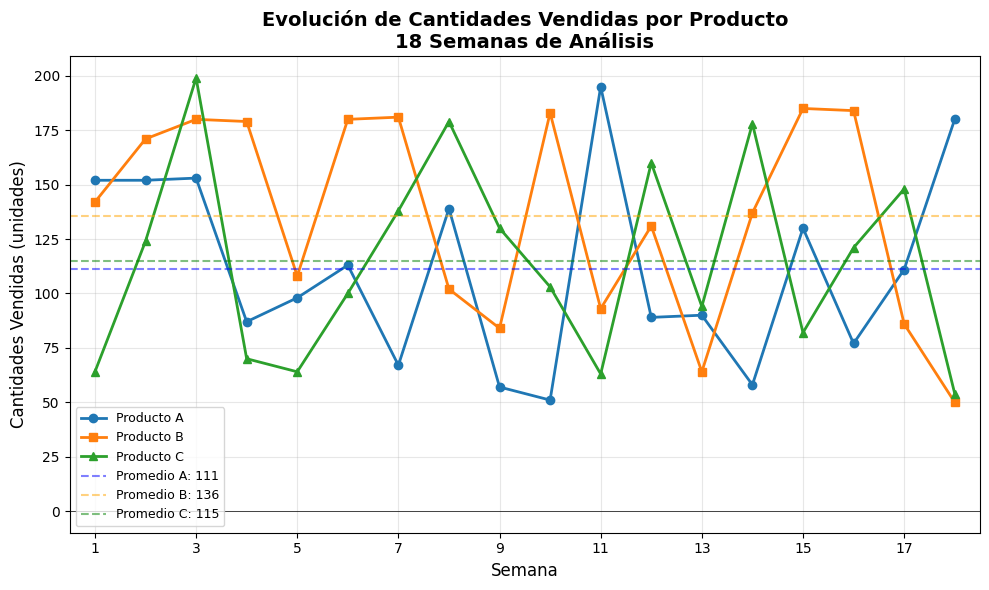

RESUMEN DE EVOLUCIÓN SEMANAL:
   Producto A: Rango 51 - 195 unidades
   Producto B: Rango 50 - 185 unidades
   Producto C: Rango 54 - 199 unidades


In [215]:
plt.figure(figsize=(10, 6))

# Grafico líneas para cada producto
plt.plot(df_empresa['semana'], df_empresa['producto_A'], 
         marker='o', label='Producto A', linewidth=2, markersize=6)
plt.plot(df_empresa['semana'], df_empresa['producto_B'], 
         marker='s', label='Producto B', linewidth=2, markersize=6)
plt.plot(df_empresa['semana'], df_empresa['producto_C'], 
         marker='^', label='Producto C', linewidth=2, markersize=6)

# Configuraciones del gráfico

plt.title('Evolución de Cantidades Vendidas por Producto\n18 Semanas de Análisis', 
          fontsize=14, fontweight='bold')
plt.xlabel('Semana', fontsize=12)
plt.ylabel('Cantidades Vendidas (unidades)', fontsize=12)

plt.grid(True, alpha=0.3)
plt.legend(loc='best', fontsize=10)
plt.axhline(0, color='black', linewidth=0.5)

plt.xticks(range(1, 19, 2))
plt.xlim(0.5, 18.5)

# Estadísticas en el gráfico
promedio_general_A = df_empresa['producto_A'].mean()
promedio_general_B = df_empresa['producto_B'].mean()
promedio_general_C = df_empresa['producto_C'].mean()

plt.axhline(promedio_general_A, color='blue', linestyle='--', alpha=0.5, label=f'Promedio A: {promedio_general_A:.0f}')
plt.axhline(promedio_general_B, color='orange', linestyle='--', alpha=0.5, label=f'Promedio B: {promedio_general_B:.0f}')
plt.axhline(promedio_general_C, color='green', linestyle='--', alpha=0.5, label=f'Promedio C: {promedio_general_C:.0f}')

plt.legend(loc='best', fontsize=9)
plt.tight_layout()
plt.show()

# Resumen estadístico de la evolución
print("RESUMEN DE EVOLUCIÓN SEMANAL:")
print(f"   Producto A: Rango {df_empresa['producto_A'].min():.0f} - {df_empresa['producto_A'].max():.0f} unidades")
print(f"   Producto B: Rango {df_empresa['producto_B'].min():.0f} - {df_empresa['producto_B'].max():.0f} unidades")
print(f"   Producto C: Rango {df_empresa['producto_C'].min():.0f} - {df_empresa['producto_C'].max():.0f} unidades")

- Crear un gráfico de barras que muestre los porcentajes (%) de participación
de A, B y C en el ingreso total.

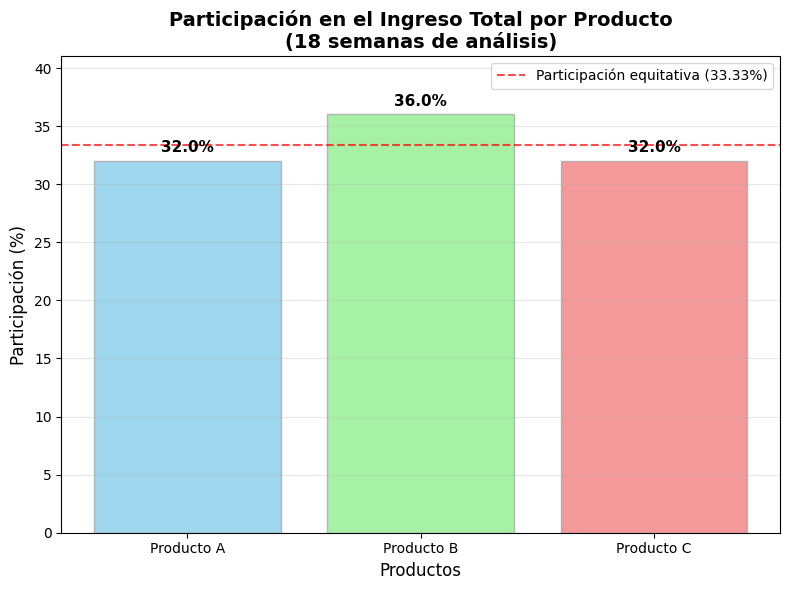

ANÁLISIS DE DISTRIBUCIÓN DE INGRESOS:
   Participación más alta: 36.00%
   Participación más baja: 31.99%
   Diferencia entre mayor y menor: 4.02 puntos porcentuales

CLASIFICACIÓN DE PRODUCTOS:
   Producto A: Principal (32.0%)
   Producto B: Principal (36.0%)
   Producto C: Principal (32.0%)


In [216]:
plt.figure(figsize=(8, 6))

# Datos para el gráfico
productos = ['Producto A', 'Producto B', 'Producto C']
participaciones = [participacion_A, participacion_B, participacion_C]
colores = ['skyblue', 'lightgreen', 'lightcoral']

# Creo gráfico de barras
barras = plt.bar(productos, participaciones, color=colores, alpha=0.8, edgecolor='darkgray', linewidth=1)

# Agrego etiquetas con valores sobre cada barra
for i, (barra, participacion) in enumerate(zip(barras, participaciones)):
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura + 0.5, 
             f'{participacion:.1f}%', ha='center', va='bottom', 
             fontweight='bold', fontsize=11)

# Configuración del gráfico
plt.title('Participación en el Ingreso Total por Producto\n(18 semanas de análisis)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Productos', fontsize=12)
plt.ylabel('Participación (%)', fontsize=12)

# Configuración de ejes y grilla
plt.grid(True, axis='y', alpha=0.3)
plt.ylim(0, max(participaciones) + 5)  # Espacio arriba para etiquetas

# Agregar línea de referencia en 33.33% (participación equitativa)
plt.axhline(33.33, color='red', linestyle='--', alpha=0.7, 
            label='Participación equitativa (33.33%)')
plt.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

# Análisis de la distribución
print("ANÁLISIS DE DISTRIBUCIÓN DE INGRESOS:")
print(f"   Participación más alta: {max(participaciones):.2f}%")
print(f"   Participación más baja: {min(participaciones):.2f}%")
print(f"   Diferencia entre mayor y menor: {max(participaciones) - min(participaciones):.2f} puntos porcentuales")

# Clasificación de productos
print("\nCLASIFICACIÓN DE PRODUCTOS:")
for i, producto in enumerate(['A', 'B', 'C']):
    participacion = participaciones[i]
    if participacion >= 40:
        categoria = "Dominante"
    elif participacion >= 30:
        categoria = "Principal"
    else:
        categoria = "Secundario"
    print(f"   Producto {producto}: {categoria} ({participacion:.1f}%)")

**Definición de funciones**

- Definir una función `clasificar_semana(df)`, donde `df` es un *DataFrame*, que clasifique a las semanas representadas en `df` como:
  - "buena semana", si el ingreso total de la semana superó en un 10% el promedio de ingreso total
  - "normal" en caso contrario

  La función debe devolver el mismo *DataFrame* `df`, pero agregando la columna `clasificacion`, con la clasificación pedida.

  Aplicar la función sobre el *DataFrame* ya construido.

In [217]:
def clasificar_semana(df):
    df_resultado = df.copy() # Creo una copia del DF para no modificar el original

    promedio_ingreso = df_resultado['ingreso_total'].mean()
    umbral_buena_semana = promedio_ingreso * 1.10  # 110% del promedio

    df_resultado['clasificacion'] = df_resultado['ingreso_total'].apply(
        lambda x: "buena semana" if x > umbral_buena_semana else "normal"
    )
    
    return df_resultado

# Aplico la función sobre el DF
df_clasificado = clasificar_semana(df_empresa)

print("CLASIFICACIÓN DE SEMANAS SEGÚN INGRESO TOTAL")
print("="*40)
print(f"Promedio de ingreso total: ${df_empresa['ingreso_total'].mean():,.2f}")
print(f"Umbral para 'buena semana': ${df_empresa['ingreso_total'].mean() * 1.10:,.2f} (+10%)")

# Mostrar resultados de clasificación
print("\nRESULTADOS DE CLASIFICACIÓN:")
clasificacion_count = df_clasificado['clasificacion'].value_counts()

for categoria, cantidad in clasificacion_count.items():
    porcentaje = (cantidad / len(df_clasificado)) * 100
    print(f"   {categoria.capitalize()}: {cantidad} semanas ({porcentaje:.1f}%)")

# Mostrar algunas semanas clasificadas como "buena semana"
buenas_semanas = df_clasificado[df_clasificado['clasificacion'] == 'buena semana']
if len(buenas_semanas) > 0:
    print("\nSEMANAS CLASIFICADAS COMO 'BUENA SEMANA':")
    for _, fila in buenas_semanas.iterrows():
        print(f"   Semana {fila['semana']:.0f}: ${fila['ingreso_total']:,.2f}")

# Muestro DF con clasificaciones
print("\nMUESTRA DEL DATAFRAME CON CLASIFICACIONES:")
columnas_muestra = ['semana', 'ingreso_total', 'clasificacion']
print(df_clasificado[columnas_muestra].head(10))

CLASIFICACIÓN DE SEMANAS SEGÚN INGRESO TOTAL
Promedio de ingreso total: $11,144.98
Umbral para 'buena semana': $12,259.48 (+10%)

RESULTADOS DE CLASIFICACIÓN:
   Normal: 13 semanas (72.2%)
   Buena semana: 5 semanas (27.8%)

SEMANAS CLASIFICADAS COMO 'BUENA SEMANA':
   Semana 2: $14,361.44
   Semana 4: $14,054.18
   Semana 6: $13,852.50
   Semana 8: $17,077.77
   Semana 16: $12,986.83

MUESTRA DEL DATAFRAME CON CLASIFICACIONES:
   semana  ingreso_total clasificacion
0       1    9251.721551        normal
1       2   14361.437603  buena semana
2       3    9580.921689        normal
3       4   14054.184714  buena semana
4       5   10550.368720        normal
5       6   13852.495464  buena semana
6       7   11830.434591        normal
7       8   17077.774119  buena semana
8       9    6653.111007        normal
9      10    7573.422320        normal


- Definir una función `clasificar_producto(df)`, donde `df` es un *DataFrame*, clasifique a cada producto según su participación sobre el ingreso total:
  - "estrella" si la participación del producto en el ingreso total es $\geq 30\%$
  - "secundario" en caso contrario

  La función debe devolver un diccionario (`dict`) con cada producto, su ingreso, su participación sobre el ingreso total y la clasificación.

  Aplicar la función sobre el *DataFrame* ya construido.

In [218]:
# Definir función clasificar_producto(df) que clasifica productos según participación en ingreso total

def clasificar_producto(df):
    """
    Clasifica cada producto según su participación en el ingreso total.
    
    Parámetros:
    df (DataFrame): DataFrame con columnas de ingresos por producto
    
    Retorna:
    dict: Diccionario con información de cada producto y su clasificación
    """
    # Calcular ingresos totales por producto
    ingreso_A = df['ingreso_A'].sum()
    ingreso_B = df['ingreso_B'].sum()
    ingreso_C = df['ingreso_C'].sum()
    
    # Calcular ingreso total de la empresa
    ingreso_total_empresa = ingreso_A + ingreso_B + ingreso_C
    
    # Calcular participaciones
    participacion_A = (ingreso_A / ingreso_total_empresa) * 100
    participacion_B = (ingreso_B / ingreso_total_empresa) * 100
    participacion_C = (ingreso_C / ingreso_total_empresa) * 100
    
    # Función para clasificar según participación
    def clasificar_por_participacion(participacion):
        return "estrella" if participacion >= 30 else "secundario"
    
    # Crear diccionario de resultados
    resultado = {
        'producto_A': {
            'ingreso': ingreso_A,
            'participacion_%': participacion_A,
            'clasificacion': clasificar_por_participacion(participacion_A)
        },
        'producto_B': {
            'ingreso': ingreso_B,
            'participacion_%': participacion_B,
            'clasificacion': clasificar_por_participacion(participacion_B)
        },
        'producto_C': {
            'ingreso': ingreso_C,
            'participacion_%': participacion_C,
            'clasificacion': clasificar_por_participacion(participacion_C)
        }
    }
    
    return resultado

# Aplicar la función sobre el DataFrame ya construido
clasificacion_productos = clasificar_producto(df_empresa)

print("CLASIFICACIÓN DE PRODUCTOS SEGÚN PARTICIPACIÓN")
print("="*40)
print("Criterio: 'estrella' si participación >= 30%, 'secundario' si < 30%")

# Mostrar resultados detallados
for producto, datos in clasificacion_productos.items():
    print(f"\n{producto.upper()}:")
    print(f"   Ingreso total: ${datos['ingreso']:,.2f}")
    print(f"   Participación: {datos['participacion_%']:.2f}%")
    print(f"   Clasificación: {datos['clasificacion'].upper()}")

# Resumen por clasificación
estrellas = [p for p, d in clasificacion_productos.items() if d['clasificacion'] == 'estrella']
secundarios = [p for p, d in clasificacion_productos.items() if d['clasificacion'] == 'secundario']

print("\nRESUMEN DE CLASIFICACIONES:")
print(f"   Productos 'estrella': {len(estrellas)} ({', '.join([p.split('_')[1].upper() for p in estrellas]) if estrellas else 'Ninguno'})")
print(f"   Productos 'secundarios': {len(secundarios)} ({', '.join([p.split('_')[1].upper() for p in secundarios]) if secundarios else 'Ninguno'})")

# Mostrar el diccionario completo
print("\nDICCIONARIO COMPLETO RETORNADO:")
pprint.pprint(clasificacion_productos, width=80)

CLASIFICACIÓN DE PRODUCTOS SEGÚN PARTICIPACIÓN
Criterio: 'estrella' si participación >= 30%, 'secundario' si < 30%

PRODUCTO_A:
   Ingreso total: $64,208.98
   Participación: 32.01%
   Clasificación: ESTRELLA

PRODUCTO_B:
   Ingreso total: $72,228.58
   Participación: 36.00%
   Clasificación: ESTRELLA

PRODUCTO_C:
   Ingreso total: $64,172.06
   Participación: 31.99%
   Clasificación: ESTRELLA

RESUMEN DE CLASIFICACIONES:
   Productos 'estrella': 3 (A, B, C)
   Productos 'secundarios': 0 (Ninguno)

DICCIONARIO COMPLETO RETORNADO:
{'producto_A': {'clasificacion': 'estrella',
                'ingreso': np.float64(64208.98272551696),
                'participacion_%': np.float64(32.0069305789478)},
 'producto_B': {'clasificacion': 'estrella',
                'ingreso': np.float64(72228.58263909843),
                'participacion_%': np.float64(36.004545348865825)},
 'producto_C': {'clasificacion': 'estrella',
                'ingreso': np.float64(64172.05750172),
                'partici

## Unidad 2

### Ejercicio 2

Una empresa trabaja con 3 áreas interdependientes: Producción ($P$), Logística ($L$) y Comercialización ($C$). Se conoce la siguiente matriz de coeficientes técnicos $A$ (insumos requeridos por cada unidad producida):

\begin{equation*}
A = \begin{bmatrix}
  & P & L & C \\
  P & 0.12 & 0.41 & 0.22 \\
  L & 0.27 & 0.52 & 0.86 \\
  C & 0.14 & 0.22 & 0.15
\end{bmatrix}
\end{equation*}

La empresa enfrenta una demanda final de $y = \begin{bmatrix} 40 & 25 & 35 \end{bmatrix}$ unidades para cada sector.

**Modelo de insumo-producto**

- Representar en Python la matriz $A$ y el vector $y$

In [219]:
# Representar en Python la matriz A y el vector y

# Matriz de coeficientes técnicos A (3x3)
# Filas: P, L, C (sectores que requieren insumos)
# Columnas: P, L, C (sectores que proveen insumos)
A = np.array([
    [0.12, 0.41, 0.22],  # P requiere de P, L, C
    [0.27, 0.52, 0.86],  # L requiere de P, L, C  
    [0.14, 0.22, 0.15]   # C requiere de P, L, C
])

print("Matriz de coeficientes técnicos A:")
print("Sectores: P (Producción), L (Logística), C (Comercialización)")
print(A)

# Vector de demanda final y (1x3)
y = np.array([40, 25, 35])

print("\nVector de demanda final y:")
print(f"P: {y[0]} unidades")
print(f"L: {y[1]} unidades") 
print(f"C: {y[2]} unidades")
print(f"Vector: {y}")

# Mostrar interpretación económica
print("\nInterpretación:")
print("- A[i,j] = cantidad del sector i requerida para producir 1 unidad del sector j")
print("- y[i] = demanda final del sector i que debe satisfacerse")

Matriz de coeficientes técnicos A:
Sectores: P (Producción), L (Logística), C (Comercialización)
[[0.12 0.41 0.22]
 [0.27 0.52 0.86]
 [0.14 0.22 0.15]]

Vector de demanda final y:
P: 40 unidades
L: 25 unidades
C: 35 unidades
Vector: [40 25 35]

Interpretación:
- A[i,j] = cantidad del sector i requerida para producir 1 unidad del sector j
- y[i] = demanda final del sector i que debe satisfacerse


- Verificar que las dimensiones (`shape`) sean compatibles para aplicar el modelo de Leontief.

In [220]:
# Verificar que las dimensiones sean compatibles para aplicar el modelo de Leontief

print("Verificación de dimensiones para el modelo de Leontief:")
print(f"Matriz A: {A.shape}")
print(f"Vector y: {y.shape}")

# Para el modelo de Leontief necesitamos:
# (I - A) * x = y
# donde I es la matriz identidad del mismo tamaño que A

n_sectores = A.shape[0]
print(f"\nNúmero de sectores: {n_sectores}")

# Verificar que A sea cuadrada
if A.shape[0] == A.shape[1]:
    print("✓ La matriz A es cuadrada (compatible)")
else:
    print("✗ La matriz A NO es cuadrada")

# Verificar que y tenga la misma dimensión que las filas de A
if y.shape[0] == A.shape[0]:
    print("✓ El vector y tiene dimensión compatible con A")
else:
    print("✗ El vector y NO tiene dimensión compatible")

# Verificar que las dimensiones permitan la operación (I - A) * x = y
I = np.eye(n_sectores)
print(f"\nMatriz identidad I: {I.shape}")
print(f"Operación (I - A): {(I - A).shape}")
print("Ecuación matricial: (I - A) * x = y")
print(f"Dimensiones: ({I.shape[0]}x{I.shape[1]}) * (x de {n_sectores}x1) = (y de {y.shape[0]}x1)")

print("\n✓ CONCLUSIÓN: Las dimensiones son compatibles para aplicar el modelo de Leontief")

Verificación de dimensiones para el modelo de Leontief:
Matriz A: (3, 3)
Vector y: (3,)

Número de sectores: 3
✓ La matriz A es cuadrada (compatible)
✓ El vector y tiene dimensión compatible con A

Matriz identidad I: (3, 3)
Operación (I - A): (3, 3)
Ecuación matricial: (I - A) * x = y
Dimensiones: (3x3) * (x de 3x1) = (y de 3x1)

✓ CONCLUSIÓN: Las dimensiones son compatibles para aplicar el modelo de Leontief
✓ La matriz A es cuadrada (compatible)
✓ El vector y tiene dimensión compatible con A

Matriz identidad I: (3, 3)
Operación (I - A): (3, 3)
Ecuación matricial: (I - A) * x = y
Dimensiones: (3x3) * (x de 3x1) = (y de 3x1)

✓ CONCLUSIÓN: Las dimensiones son compatibles para aplicar el modelo de Leontief


- Calcular la matriz inversa de Leontief y, utilizando el modelo, obtener el vector de producción total.

In [221]:
# Calcular la matriz inversa de Leontief y obtener el vector de producción total

# Paso 1: Crear la matriz identidad
I = np.eye(3)
print("Matriz identidad I:")
print(I)

# Paso 2: Calcular (I - A)
I_menos_A = I - A
print("\nMatriz (I - A):")
print(I_menos_A)

# Paso 3: Calcular la matriz inversa de Leontief (I - A)^(-1)
inversa_leontief = np.linalg.inv(I_menos_A)
print("\nMatriz inversa de Leontief (I - A)^(-1):")
print(np.round(inversa_leontief, 4))

# Paso 4: Aplicar el modelo de Leontief: x = (I - A)^(-1) * y
x = np.dot(inversa_leontief, y)

print("\nVECTOR DE PRODUCCIÓN TOTAL (x):")
print(f"Producción (P): {x[0]:.2f} unidades")
print(f"Logística (L): {x[1]:.2f} unidades")
print(f"Comercialización (C): {x[2]:.2f} unidades")

print(f"\nVector x completo: {np.round(x, 2)}")

# Interpretación económica
print("\nInterpretación económica:")
print("- Para satisfacer la demanda final, se necesita producir:")
print(f"  * {x[0]:.2f} unidades totales en Producción (vs {y[0]} de demanda final)")
print(f"  * {x[1]:.2f} unidades totales en Logística (vs {y[1]} de demanda final)")  
print(f"  * {x[2]:.2f} unidades totales en Comercialización (vs {y[2]} de demanda final)")
print("- La diferencia incluye la producción para consumo intermedio entre sectores")

Matriz identidad I:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Matriz (I - A):
[[ 0.88 -0.41 -0.22]
 [-0.27  0.48 -0.86]
 [-0.14 -0.22  0.85]]

Matriz inversa de Leontief (I - A)^(-1):
[[10.3047 18.6926 21.5796]
 [16.4791 33.7776 38.4402]
 [ 5.9624 11.8212 14.68  ]]

VECTOR DE PRODUCCIÓN TOTAL (x):
Producción (P): 1634.79 unidades
Logística (L): 2849.01 unidades
Comercialización (C): 1047.83 unidades

Vector x completo: [1634.79 2849.01 1047.83]

Interpretación económica:
- Para satisfacer la demanda final, se necesita producir:
  * 1634.79 unidades totales en Producción (vs 40 de demanda final)
  * 2849.01 unidades totales en Logística (vs 25 de demanda final)
  * 1047.83 unidades totales en Comercialización (vs 35 de demanda final)
- La diferencia incluye la producción para consumo intermedio entre sectores


- Usando `NumPy`, calcular determinante y rango de la matriz $(I - A)$. ¿Qué implicaría para la viabilidad del modelo si el determinante fuera 0? Probar que no lo es.

In [222]:
# Calcular determinante y rango de la matriz (I - A)

# Calcular determinante
det_I_menos_A = np.linalg.det(I_menos_A)
print(f"Determinante de (I - A): {det_I_menos_A:.6f}")

# Calcular rango
rango_I_menos_A = np.linalg.matrix_rank(I_menos_A)
print(f"Rango de (I - A): {rango_I_menos_A}")

# Análisis de viabilidad del modelo
print("\nANÁLISIS DE VIABILIDAD:")

if abs(det_I_menos_A) > 1e-10:  # Considerando errores de precisión numérica
    print("✓ El determinante NO es cero")
    print("✓ La matriz (I - A) es invertible")
    print("✓ El modelo de Leontief es viable")
else:
    print("✗ El determinante es cero (o muy próximo a cero)")
    print("✗ La matriz (I - A) NO es invertible")
    print("✗ El modelo de Leontief NO es viable")

print("\n¿Qué implicaría si el determinante fuera 0?")
print("- La matriz (I - A) no sería invertible")
print("- No existiría solución única para el sistema (I - A) * x = y")
print("- El modelo económico no sería viable:")
print("  * Los sectores estarían en dependencia circular absoluta")
print("  * No habría producción neta disponible para demanda final")
print("  * El sistema económico sería insostenible")

# Verificación adicional
print("\nVERIFICACIÓN:")
print(f"- Determinante = {det_I_menos_A:.6f} ≠ 0")
print(f"- Rango = {rango_I_menos_A} = dimensión de la matriz ({I_menos_A.shape[0]})")
print("- Por tanto, la matriz es de rango completo e invertible")

# Condición económica adicional (valores propios)
eigenvalues = np.linalg.eigvals(A)
print(f"\nValores propios de A: {np.round(eigenvalues, 4)}")
max_eigenvalue = max(abs(eigenvalues))
print(f"Valor propio dominante: {max_eigenvalue:.4f}")
if max_eigenvalue < 1:
    print("✓ Todos los valores propios de A son menores que 1 (condición de productividad)")

Determinante de (I - A): 0.021233
Rango de (I - A): 3

ANÁLISIS DE VIABILIDAD:
✓ El determinante NO es cero
✓ La matriz (I - A) es invertible
✓ El modelo de Leontief es viable

¿Qué implicaría si el determinante fuera 0?
- La matriz (I - A) no sería invertible
- No existiría solución única para el sistema (I - A) * x = y
- El modelo económico no sería viable:
  * Los sectores estarían en dependencia circular absoluta
  * No habría producción neta disponible para demanda final
  * El sistema económico sería insostenible

VERIFICACIÓN:
- Determinante = 0.021233 ≠ 0
- Rango = 3 = dimensión de la matriz (3)
- Por tanto, la matriz es de rango completo e invertible

Valores propios de A: [ 0.9824+0.j     -0.0962+0.0866j -0.0962-0.0866j]
Valor propio dominante: 0.9824
✓ Todos los valores propios de A son menores que 1 (condición de productividad)


- Verificar con operaciones matriciales que $x - A \cdot x = y$. Interpretar brevemente qué significa esta igualdad en términos económicos

In [223]:
# Verificar con operaciones matriciales que x - A * x = y

# Calcular A * x (insumos intermedios)
A_por_x = np.dot(A, x)
print("Verificación de la identidad fundamental: x - A * x = y")
print("="*40)

print("Vector de producción total (x):")
print(f"{np.round(x, 2)}")

print("\nMatriz A * x (insumos intermedios):")
print(f"{np.round(A_por_x, 2)}")

# Calcular x - A * x
diferencia = x - A_por_x
print("\nResultado de x - A * x:")
print(f"{np.round(diferencia, 2)}")

print("\nVector de demanda final (y):")
print(f"{y}")

# Verificar igualdad con tolerancia numérica
tolerancia = 1e-10
if np.allclose(diferencia, y, atol=tolerancia):
    print("✓ VERIFICACIÓN EXITOSA: x - A * x = y")
else:
    print("✗ ERROR EN VERIFICACIÓN")

print("\nDiferencias (deben ser muy pequeñas):")
print(f"{np.round(diferencia - y, 8)}")

# Interpretación económica de la identidad x - A * x = y
print("\nINTERPRETACIÓN ECONÓMICA de x - A * x = y:")
print("- x: Producción total de cada sector")
print("- A * x: Insumos intermedios consumidos por todos los sectores")
print("- x - A * x: Producción neta disponible para demanda final")
print("- y: Demanda final que debe satisfacerse")

print("\nPor sectores:")
for i, sector in enumerate(['P (Producción)', 'L (Logística)', 'C (Comercialización)']):
    print(f"{sector}:")
    print(f"  Producción total: {x[i]:.2f}")
    print(f"  Insumos intermedios: {A_por_x[i]:.2f}")
    print(f"  Disponible para demanda final: {diferencia[i]:.2f}")
    print(f"  Demanda final requerida: {y[i]:.2f}")

print("\nEsta igualdad representa el equilibrio del modelo:")
print("La producción neta (después de descontar insumos) = Demanda final")

Verificación de la identidad fundamental: x - A * x = y
Vector de producción total (x):
[1634.79 2849.01 1047.83]

Matriz A * x (insumos intermedios):
[1594.79 2824.01 1012.83]

Resultado de x - A * x:
[40. 25. 35.]

Vector de demanda final (y):
[40 25 35]
✓ VERIFICACIÓN EXITOSA: x - A * x = y

Diferencias (deben ser muy pequeñas):
[0. 0. 0.]

INTERPRETACIÓN ECONÓMICA de x - A * x = y:
- x: Producción total de cada sector
- A * x: Insumos intermedios consumidos por todos los sectores
- x - A * x: Producción neta disponible para demanda final
- y: Demanda final que debe satisfacerse

Por sectores:
P (Producción):
  Producción total: 1634.79
  Insumos intermedios: 1594.79
  Disponible para demanda final: 40.00
  Demanda final requerida: 40.00
L (Logística):
  Producción total: 2849.01
  Insumos intermedios: 2824.01
  Disponible para demanda final: 25.00
  Demanda final requerida: 25.00
C (Comercialización):
  Producción total: 1047.83
  Insumos intermedios: 1012.83
  Disponible para dema

- La empresa estima que: la demanda final del área de Producción ($P$) aumentará un 2%, la demanda final del área de Logística ($L$) aumentará un 7%, pero la demanda final del área de Comercialización ($C$) disminuirá en un 4%. Calcular el nuevo vector de producción total ante este shock conjunto. Comparar el vector resultante con el vector de producción total inicial y responder: ¿cómo se reasigna la demanda de insumos?

In [224]:
# Calcular nuevo vector de producción total ante shock de demanda

# Demanda inicial
print("ANÁLISIS DE SHOCK EN LA DEMANDA")
print("="*40)

print("Demanda inicial (y):")
print(f"P: {y[0]} unidades")
print(f"L: {y[1]} unidades")
print(f"C: {y[2]} unidades")

# Aplicar cambios porcentuales
# P aumenta 2%, L aumenta 7%, C disminuye 4%
y_nuevo = np.array([
    y[0] * 1.02,  # P: +2%
    y[1] * 1.07,  # L: +7%
    y[2] * 0.96   # C: -4%
])

print("\nDemanda después del shock (y_nuevo):")
print(f"P: {y_nuevo[0]:.2f} unidades (+2%)")
print(f"L: {y_nuevo[1]:.2f} unidades (+7%)")
print(f"C: {y_nuevo[2]:.2f} unidades (-4%)")

# Calcular nuevo vector de producción total
x_nuevo = np.dot(inversa_leontief, y_nuevo)

print("\nPRODUCCIÓN TOTAL:")
print("Inicial vs Nueva:")
for i, sector in enumerate(['P (Producción)', 'L (Logística)', 'C (Comercialización)']):
    cambio_abs = x_nuevo[i] - x[i]
    cambio_pct = ((x_nuevo[i] - x[i]) / x[i]) * 100
    print(f"{sector}:")
    print(f"  Inicial: {x[i]:.2f} → Nuevo: {x_nuevo[i]:.2f}")
    print(f"  Cambio: {cambio_abs:+.2f} unidades ({cambio_pct:+.2f}%)")

# Análisis de reasignación de demanda de insumos
A_por_x_inicial = np.dot(A, x)
A_por_x_nuevo = np.dot(A, x_nuevo)

print("\nREASIGNACIÓN DE DEMANDA DE INSUMOS:")
print("Cambios en insumos intermedios requeridos:")

for i, sector in enumerate(['P', 'L', 'C']):
    cambio_insumos = A_por_x_nuevo[i] - A_por_x_inicial[i]
    cambio_pct_insumos = ((A_por_x_nuevo[i] - A_por_x_inicial[i]) / A_por_x_inicial[i]) * 100
    print(f"Sector {sector}:")
    print(f"  Insumos iniciales: {A_por_x_inicial[i]:.2f}")
    print(f"  Insumos nuevos: {A_por_x_nuevo[i]:.2f}")
    print(f"  Cambio: {cambio_insumos:+.2f} unidades ({cambio_pct_insumos:+.2f}%)")

# Resumen del impacto
cambio_total_demanda = np.sum(y_nuevo) - np.sum(y)
cambio_total_produccion = np.sum(x_nuevo) - np.sum(x)

print("\nRESUMEN DEL IMPACTO:")
print(f"Cambio total en demanda final: {cambio_total_demanda:+.2f} unidades")
print(f"Cambio total en producción: {cambio_total_produccion:+.2f} unidades")
print(f"Multiplicador del sistema: {cambio_total_produccion/cambio_total_demanda:.2f}")
print(f"Cada unidad adicional de demanda final requiere {cambio_total_produccion/cambio_total_demanda:.2f} unidades de producción total")

ANÁLISIS DE SHOCK EN LA DEMANDA
Demanda inicial (y):
P: 40 unidades
L: 25 unidades
C: 35 unidades

Demanda después del shock (y_nuevo):
P: 40.80 unidades (+2%)
L: 26.75 unidades (+7%)
C: 33.60 unidades (-4%)

PRODUCCIÓN TOTAL:
Inicial vs Nueva:
P (Producción):
  Inicial: 1634.79 → Nuevo: 1645.53
  Cambio: +10.74 unidades (+0.66%)
L (Logística):
  Inicial: 2849.01 → Nuevo: 2867.49
  Cambio: +18.48 unidades (+0.65%)
C (Comercialización):
  Inicial: 1047.83 → Nuevo: 1052.73
  Cambio: +4.91 unidades (+0.47%)

REASIGNACIÓN DE DEMANDA DE INSUMOS:
Cambios en insumos intermedios requeridos:
Sector P:
  Insumos iniciales: 1594.79
  Insumos nuevos: 1604.73
  Cambio: +9.94 unidades (+0.62%)
Sector L:
  Insumos iniciales: 2824.01
  Insumos nuevos: 2840.74
  Cambio: +16.73 unidades (+0.59%)
Sector C:
  Insumos iniciales: 1012.83
  Insumos nuevos: 1019.13
  Cambio: +6.31 unidades (+0.62%)

RESUMEN DEL IMPACTO:
Cambio total en demanda final: +1.15 unidades
Cambio total en producción: +34.13 unidades


- Analizar la sensibilidad del modelo. Para ello, discutir brevemente los efectos de un cambio en el coeficiente técnico de $P \to L$  (por ejemplo, un aumento de 0.28 a 0.35). Sin recalcular el vector de producción total, ¿qué efecto tiene en la asignación de recursos y por qué?

In [225]:
# Analizar sensibilidad del modelo: cambio en coeficiente técnico P → L

print("ANÁLISIS DE SENSIBILIDAD DEL MODELO")
print("="*40)
print("Efecto de cambiar el coeficiente técnico P → L de 0.27 a 0.35")

# Coeficiente actual P → L (fila 1, columna 0)
coef_actual = A[1, 0]  # L requiere de P
coef_nuevo = 0.35

print("\nCoeficiente técnico P → L:")
print(f"Actual: {coef_actual}")
print(f"Nuevo: {coef_nuevo}")
print(f"Cambio: +{coef_nuevo - coef_actual:.2f} (+{((coef_nuevo - coef_actual)/coef_actual)*100:.1f}%)")

print("\nINTERPRETACIÓN ECONÓMICA:")
print("- Este coeficiente representa cuántas unidades de Producción")
print("  necesita el sector Logística para producir 1 unidad")
print("- El aumento de 0.27 a 0.35 significa:")
print("  * Mayor dependencia de Logística hacia Producción")
print("  * Tecnología menos eficiente en Logística")
print("  * Mayor consumo de insumos de Producción")

print("\nEFECTOS EN LA ASIGNACIÓN DE RECURSOS (sin recalcular):")

print("\n1. IMPACTO DIRECTO:")
print("   - Logística necesitará más insumos de Producción")
print("   - Para la misma demanda final, se requerirá mayor producción total")
print("   - El sector Producción enfrentará mayor presión de demanda intermedia")

print("\n2. EFECTOS MULTIPLICADORES:")
print("   - Producción necesitará más insumos de todos los sectores")
print("   - Se generan efectos en cadena por las interdependencias")
print("   - El multiplicador del sistema aumentará")

print("\n3. IMPLICACIONES PARA LA EFICIENCIA:")
print("   - Menor eficiencia técnica en el sector Logística")
print("   - Mayor costo de oportunidad de los recursos")
print("   - Posible aumento en los precios finales")

print("\n4. REASIGNACIÓN DE RECURSOS:")
print("   - Más recursos hacia el sector Producción")
print("   - Menor disponibilidad relativa para demanda final")
print("   - Necesidad de rebalancear la economía sectorial")

print("\nCONCLUSIÓN:")
print("Un aumento en este coeficiente técnico hace el sistema menos eficiente,")
print("requiriendo más producción total para satisfacer la misma demanda final.")
print("Esto refleja una tecnología menos productiva en el sector Logística.")

ANÁLISIS DE SENSIBILIDAD DEL MODELO
Efecto de cambiar el coeficiente técnico P → L de 0.27 a 0.35

Coeficiente técnico P → L:
Actual: 0.27
Nuevo: 0.35
Cambio: +0.08 (+29.6%)

INTERPRETACIÓN ECONÓMICA:
- Este coeficiente representa cuántas unidades de Producción
  necesita el sector Logística para producir 1 unidad
- El aumento de 0.27 a 0.35 significa:
  * Mayor dependencia de Logística hacia Producción
  * Tecnología menos eficiente en Logística
  * Mayor consumo de insumos de Producción

EFECTOS EN LA ASIGNACIÓN DE RECURSOS (sin recalcular):

1. IMPACTO DIRECTO:
   - Logística necesitará más insumos de Producción
   - Para la misma demanda final, se requerirá mayor producción total
   - El sector Producción enfrentará mayor presión de demanda intermedia

2. EFECTOS MULTIPLICADORES:
   - Producción necesitará más insumos de todos los sectores
   - Se generan efectos en cadena por las interdependencias
   - El multiplicador del sistema aumentará

3. IMPLICACIONES PARA LA EFICIENCIA:
  

### Ejercicio 3

Supongamos, para la misma empresa del ejercicio anterior, que el costo unitario de producción es $c = \begin{bmatrix} 7 & 5 & 6 \end{bmatrix}$ para $P$, $L$ y $C$ respectivamente. A su vez, la empresa dispone de un presupuesto máximo de $ \$1500 $.

El problema se formaliza como:
$$\max Z = P + L + C \quad \text{s.a.} \quad  \left\{
  \begin{aligned}
  7 \cdot P + 5 \cdot L + 6 \cdot C & \leq 1500 \\
  P, L, C & \geq 0
  \end{aligned}
  \right.
$$

- Resolver con `PuLP` el problema definido anteriormente.

In [226]:
# Ejercicio 3: Programación lineal con PuLP
# Maximizar la producción total bajo restricción de presupuesto

# Variables de decisión
P = LpVariable('P', lowBound=0)
L = LpVariable('L', lowBound=0)
C = LpVariable('C', lowBound=0)

# Definir el modelo
modelo = LpProblem("Maximizar_produccion", LpMaximize)

# Función objetivo
modelo += P + L + C

# Restricción de presupuesto
modelo += 7*P + 5*L + 6*C <= 1500

# Resolver
modelo.solve()

# Resultados
print("Resultados del modelo:")
print(f"P = {P.varValue:.2f}")
print(f"L = {L.varValue:.2f}")
print(f"C = {C.varValue:.2f}")
print(f"Producción total máxima: {float(modelo.objective.value()):.2f}")
print(f"Presupuesto utilizado: {7*P.varValue + 5*L.varValue + 6*C.varValue:.2f}")

Resultados del modelo:
P = 0.00
L = 300.00
C = 0.00
Producción total máxima: 300.00
Presupuesto utilizado: 1500.00
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/alexballera/Documents/uba/laboratorio-datos-fce/.venv/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/linux/i64/cbc /tmp/ca78f491e30a441093cd688e6b1b217e-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/ca78f491e30a441093cd688e6b1b217e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 6 COLUMNS
At line 13 RHS
At line 15 BOUNDS
At line 16 ENDATA
Problem MODEL has 1 rows, 3 columns and 3 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-1) rows, 0 (-3) columns and 0 (-3) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 300
After Postsolve, objective 300, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 300 - 0 ite

- Interpretar los resultados obtenidos.

In [227]:
# Interpretación de los resultados obtenidos

print("Interpretación:")
print("La solución muestra cuántas unidades producir de cada área para maximizar la producción total, respetando el presupuesto.")
print("Si una variable queda en cero, significa que no conviene producir ese área bajo las condiciones dadas.")
print("El presupuesto se usa completamente si la restricción es activa.")

Interpretación:
La solución muestra cuántas unidades producir de cada área para maximizar la producción total, respetando el presupuesto.
Si una variable queda en cero, significa que no conviene producir ese área bajo las condiciones dadas.
El presupuesto se usa completamente si la restricción es activa.


Ahora, la casa matriz de la empresa propone una nueva visión comercial, donde, en lugar de imponer cotas mínimas absolutas, impone cotas mínimas relativas en función de lo gastado en logística:
  - una cota mínima para $P$, donde $P \geq \alpha \cdot L$
  - una cota mínima para $C$, donde $C \geq \beta \cdot L$

Asumamos $\alpha = 0.3$ y $\beta = 0.2$. Así:

$$ \left\{
  \begin{aligned}
  P & \geq 0.3 \cdot L \\
  C & \geq 0.2 \cdot L
  \end{aligned}
  \right.
$$

- Reformular el problema y resolverlo con `PuLP`. Interpretar los resultados obtenidos y comparar con el caso inicial.

In [228]:
# Reformulación con cotas mínimas relativas
# P >= 0.3*L, C >= 0.2*L

# Definir nuevo modelo
modelo2 = LpProblem("Maximizar_produccion_con_cotas_minimas", LpMaximize)

# Variables de decisión (ya definidas)
# P, L, C

# Función objetivo
modelo2 += P + L + C

# Restricción de presupuesto
modelo2 += 7*P + 5*L + 6*C <= 1500

# Restricciones mínimas relativas
modelo2 += P >= 0.3*L
modelo2 += C >= 0.2*L

# Resolver
modelo2.solve()

# Mostrar resultados
print("Resultados con cotas mínimas relativas:")
print(f"P = {P.varValue:.2f}")
print(f"L = {L.varValue:.2f}")
print(f"C = {C.varValue:.2f}")
print(f"Producción total máxima: {value(modelo2.objective):.2f}")
print(f"Presupuesto utilizado: {7*P.varValue + 5*L.varValue + 6*C.varValue:.2f}")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/alexballera/Documents/uba/laboratorio-datos-fce/.venv/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/linux/i64/cbc /tmp/021c113edefc4e60a43101d78404e9f7-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/021c113edefc4e60a43101d78404e9f7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 19 RHS
At line 23 BOUNDS
At line 24 ENDATA
Problem MODEL has 3 rows, 3 columns and 7 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (0) rows, 3 (0) columns and 7 (0) elements
0  Obj -0 Dual inf 3.3999997 (3)
0  Obj -0 Dual inf 3.3999997 (3)
3  Obj 271.08434
Optimal - objective value 271.08434
Optimal objective 271.0843373 - 3 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00



- Discutir cómo afectan las cotas mínimas al problema de maximización de la producción.

In [229]:
# Interpretación y comparación de resultados

print("Interpretación:")
print("Las cotas mínimas obligan a producir una cantidad mínima de P y C en función de L.")
print("Esto puede reducir la producción total máxima, ya que el modelo debe cumplir más restricciones.")
print("Comparando con el caso inicial, puede cambiar la asignación óptima de recursos.")

Interpretación:
Las cotas mínimas obligan a producir una cantidad mínima de P y C en función de L.
Esto puede reducir la producción total máxima, ya que el modelo debe cumplir más restricciones.
Comparando con el caso inicial, puede cambiar la asignación óptima de recursos.

Las cotas mínimas obligan a producir una cantidad mínima de P y C en función de L.
Esto puede reducir la producción total máxima, ya que el modelo debe cumplir más restricciones.
Comparando con el caso inicial, puede cambiar la asignación óptima de recursos.


## Unidad 3

### Ejercicio 4

Una empresa enfrenta la siguiente demanda inversa: $$p(q) = 500 - 0.5 \cdot q - 0.002 \cdot q$$

y un costo total: $$C(q) = 300 + 8 \cdot q + 0.05 \cdot q$$

- Definir (y si considera necesario, simplificar) el ingreso y el beneficio.

  *Ayuda*: recordar que `sp.rational(5, 100) = 0.05`

In [230]:
# Paso 1: Definición simbólica de funciones

# Definir variable simbólica
q = sp.symbols('q')

# Demanda inversa: p(q) = 500 - 0.5*q - 0.002*q**2
p = 500 - 0.5*q - 0.002*q**2

# Costo total: C(q) = 300 + 8*q + 0.05*q**2
C = 300 + 8*q + 0.05*q**2

# Ingreso total: IT(q) = p(q) * q
IT = p * q

# Beneficio: B(q) = IT(q) - C(q)
B = IT - C

# Mostramos las funciones
print('Demanda inversa p(q):', p)
print('Costo total C(q):', C)
print('Ingreso total IT(q):', IT)
print('Beneficio B(q):', B)

Demanda inversa p(q): -0.002*q**2 - 0.5*q + 500
Costo total C(q): 0.05*q**2 + 8*q + 300
Ingreso total IT(q): q*(-0.002*q**2 - 0.5*q + 500)
Beneficio B(q): -0.05*q**2 + q*(-0.002*q**2 - 0.5*q + 500) - 8*q - 300


- Hallar simbólicamente la cantidad que maximiza el beneficio. Justifique.

In [231]:
# Paso 2: Derivada y maximización simbólica del beneficio
# Calculamos la derivada de B(q) y resolvemos B'(q) = 0

# Derivada del beneficio respecto a q
B_deriv = sp.diff(B, q)

# Encontrar el valor óptimo de q que maximiza el beneficio
q_opt = sp.solve(B_deriv, q)

# Filtramos solo soluciones reales y positivas
q_opt_real = [val.evalf() for val in q_opt if val.is_real and val > 0]

# Calculamos el precio, ingreso y beneficio óptimos
if q_opt_real:
    q_star = q_opt_real[0]
    p_star = p.subs(q, q_star)
    IT_star = IT.subs(q, q_star)
    C_star = C.subs(q, q_star)
    B_star = B.subs(q, q_star)
    print(f"Cantidad óptima q*: {q_star:.2f}")
    print(f"Precio óptimo p*: {p_star:.2f}")
    print(f"Ingreso total óptimo: {IT_star:.2f}")
    print(f"Costo total óptimo: {C_star:.2f}")
    print(f"Beneficio máximo: {B_star:.2f}")
else:
    print("No se encontró solución real y positiva para la cantidad óptima.")

Cantidad óptima q*: 209.00
Precio óptimo p*: 308.13
Ingreso total óptimo: 64400.95
Costo total óptimo: 4156.16
Beneficio máximo: 60244.79


- Analice el Excedente del Consumidor y el Beneficio Social.

In [232]:
# Paso 3: Excedente del consumidor y beneficio social
# Excedente del consumidor: área entre la curva de demanda y el precio de mercado
# Beneficio social: suma de excedente del consumidor y beneficio del productor

# Precio máximo dispuesto a pagar (cuando q = 0)
p_max = p.subs(q, 0)

# Excedente del consumidor (aproximación gráfica)
# Integramos simbólicamente desde q = 0 hasta q* la diferencia entre p(q) y p*
if 'q_star' in locals():
    excedente_consumidor = sp.integrate(p - p_star, (q, 0, q_star))
    beneficio_social = excedente_consumidor + B_star
    print(f"Excedente del consumidor: {excedente_consumidor:.2f}")
    print(f"Beneficio social: {beneficio_social:.2f}")
else:
    print("No se puede calcular el excedente sin cantidad óptima.")

Excedente del consumidor: 23093.77
Beneficio social: 83338.56


- Grafique e interprete a nivel económico.

Interpretación económica:
El excedente del consumidor representa el beneficio que obtienen los compradores por pagar menos de lo que estarían dispuestos a pagar.
El beneficio social es la suma del excedente del consumidor y el beneficio del productor, mostrando el bienestar total generado por el mercado.


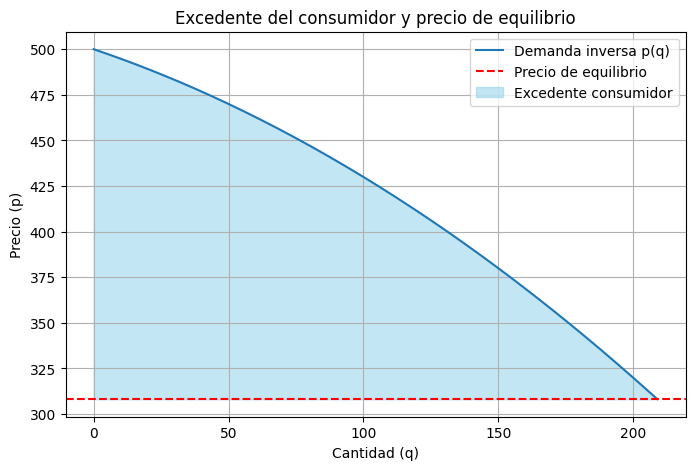

In [233]:
# Paso 4: Interpretación económica y visualización
print("Interpretación económica:")
print("El excedente del consumidor representa el beneficio que obtienen los compradores por pagar menos de lo que estarían dispuestos a pagar.")
print("El beneficio social es la suma del excedente del consumidor y el beneficio del productor, mostrando el bienestar total generado por el mercado.")

# Visualización gráfica

q_vals = np.linspace(0, float(q_star), 200)
p_vals = [float(p.subs(q, val)) for val in q_vals]
p_equilibrio = float(p_star)

plt.figure(figsize=(8,5))
plt.plot(q_vals, p_vals, label='Demanda inversa p(q)')
plt.axhline(p_equilibrio, color='red', linestyle='--', label='Precio de equilibrio')
plt.fill_between(q_vals, p_vals, p_equilibrio, where=(np.array(p_vals)>p_equilibrio), color='skyblue', alpha=0.5, label='Excedente consumidor')
plt.xlabel('Cantidad (q)')
plt.ylabel('Precio (p)')
plt.title('Excedente del consumidor y precio de equilibrio')
plt.legend()
plt.grid(True)
plt.show()

**Conclusión:**

El excedente del consumidor y el beneficio social permiten analizar el impacto de la estructura de mercado sobre el bienestar. En mercados competitivos, el excedente suele ser mayor, mientras que en situaciones de monopolio el beneficio se concentra en el productor y el precio es más alto para los consumidores. La visualización ayuda a interpretar estos conceptos de manera clara y aplicada a la gestión empresarial.

### Ejercicio 5

Dado el siguiente mercado de computadoras, se presenta una función de Demanda: $$ Q^{d}(p) = 80 - p^{3} - 0.3 \cdot p^{2} + p$$

- Halle la derivada de mayor orden no nula de la función.

In [234]:
# Ejercicio 5
# Definir función de demanda y calcular derivadas simbólicas

p = sp.symbols('p')
Qd = 80 - p**3 - 0.3*p**2 + p

# Derivadas sucesivas
Qd_1 = sp.diff(Qd, p)
Qd_2 = sp.diff(Qd_1, p)
Qd_3 = sp.diff(Qd_2, p)
Qd_4 = sp.diff(Qd_3, p)

print('Demanda:', Qd)
print('Primera derivada:', Qd_1)
print('Segunda derivada:', Qd_2)
print('Tercera derivada:', Qd_3)
print('Cuarta derivada:', Qd_4)

# Mostrar la derivada de mayor orden no nula
for i, deriv in enumerate([Qd_1, Qd_2, Qd_3, Qd_4], start=1):
    if deriv != 0:
        print(f'Derivada de orden {i}:', deriv)

Demanda: -p**3 - 0.3*p**2 + p + 80
Primera derivada: -3*p**2 - 0.6*p + 1
Segunda derivada: -6*p - 0.6
Tercera derivada: -6
Cuarta derivada: 0
Derivada de orden 1: -3*p**2 - 0.6*p + 1
Derivada de orden 2: -6*p - 0.6
Derivada de orden 3: -6


- Optimice la función. ¿Posee un mínimo o máximo local la función de demanda? ¿Por qué?

In [235]:
# Optimización de la función de demanda
# Buscamos extremos locales (máximos o mínimos)
Qd_1 = sp.diff(Qd, p)
soluciones = sp.solve(Qd_1, p)

# Analizamos la naturaleza de los extremos
for s in soluciones:
    valor = Qd.subs(p, s)
    segunda = sp.diff(Qd_1, p).subs(p, s)
    tipo = 'mínimo' if segunda > 0 else 'máximo' if segunda < 0 else 'punto de inflexión'
    print(f'Extremo en p = {s:.2f}: Qd = {valor:.2f} ({tipo})')

print('La función de demanda puede tener extremos locales dependiendo del signo de la segunda derivada.')

Extremo en p = -0.69: Qd = 79.50 (mínimo)
Extremo en p = 0.49: Qd = 80.30 (máximo)
La función de demanda puede tener extremos locales dependiendo del signo de la segunda derivada.


- Calcule la elasticidad precio de la demanda y analizar a qué tipo de elasticidad pertenece. Además, value las elasticidades para los siguientes valores de precio.
  - $p = 1$
  - $p = 2$
  - $p = 8$

In [236]:
# Elasticidad precio de la demanda
# Fórmula: E = (dQ/dp) * (p/Q)
Qd_1 = sp.diff(Qd, p)
E = Qd_1 * (p / Qd)
print('Elasticidad precio de la demanda (simbólica):', E)

# Evaluamos la elasticidad para p = 1, 2, 8
for precio in [1, 2, 8]:
    valor = E.subs(p, precio).evalf()
    tipo = 'elástica' if abs(valor) > 1 else 'inelástica' if abs(valor) < 1 else 'unitaria'
    print(f'Para p = {precio}: Elasticidad = {valor:.2f} ({tipo})')

Elasticidad precio de la demanda (simbólica): p*(-3*p**2 - 0.6*p + 1)/(-p**3 - 0.3*p**2 + p + 80)
Para p = 1: Elasticidad = -0.03 (inelástica)
Para p = 2: Elasticidad = -0.34 (inelástica)
Para p = 8: Elasticidad = 3.53 (elástica)
Para p = 2: Elasticidad = -0.34 (inelástica)
Para p = 8: Elasticidad = 3.53 (elástica)


- Ahora, si usted decide analizar la elasticidad de un mercado que le interese en la vida real, ¿cómo procedería para analizarlo?

**¿Cómo analizar la elasticidad en un mercado real?**

1. Recolectar datos históricos de precios y cantidades vendidas.
2. Estimar la función de demanda usando métodos estadísticos (regresión).
3. Calcular la elasticidad en distintos rangos de precios.
4. Interpretar si la demanda es elástica o inelástica para tomar decisiones de precios y estrategias comerciales.

La elasticidad ayuda a entender cómo reaccionan los consumidores ante cambios de precio y es clave para la gestión empresarial.